In [1]:
#Instalando as bibliotecas no proprio Terminal
#!pip install streamlit
#!pip install numpy pandas
#!pip install matplotlib scikit-learn

#Inicializando o Df
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

df = pd.read_csv("survey_results_public.csv")
df.head

<bound method NDFrame.head of        Respondent                                         MainBranch Hobbyist  \
0               1                     I am a developer by profession      Yes   
1               2                     I am a developer by profession       No   
2               3                        I code primarily as a hobby      Yes   
3               4                     I am a developer by profession      Yes   
4               5  I used to be a developer by profession, but no...      Yes   
...           ...                                                ...      ...   
64456       64858                                                NaN      Yes   
64457       64867                                                NaN      Yes   
64458       64898                                                NaN      Yes   
64459       64925                                                NaN      Yes   
64460       65112                                                NaN      Yes  

In [2]:
#Manipulando o df
#so uma ideia, a gnt podia dar um jeito dele ja converter a moeda para o pais que a pessoa selecionou
df = df[["Country", "EdLevel", "YearsCodePro", "Employment", "ConvertedComp"]] #Selecionando as colunas
df = df.rename({"ConvertedComp": "Salary"}, axis = 1) #Renomeando uma coluna
df = df[df["Salary"].notnull()]
df.head()

,Country,EdLevel,YearsCodePro,Employment,Salary
7,United States,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",13,Employed full-time,116000.0
9,United Kingdom,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",4,Employed full-time,32315.0
10,United Kingdom,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",2,Employed full-time,40070.0
11,Spain,Some college/university study without earning ...,7,Employed full-time,14268.0
12,Netherlands,"Secondary school (e.g. American high school, G...",20,Employed full-time,38916.0


In [3]:
#Limpando o df
df = df.dropna()
df.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
dtype: int64

In [4]:
#Tornando especifico para Trabalhos Integrais
df = df[df["Employment"] == "Employed full-time"]
df = df.drop("Employment", axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30019 entries, 7 to 64154
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       30019 non-null  object 
 1   EdLevel       30019 non-null  object 
 2   YearsCodePro  30019 non-null  object 
 3   Salary        30019 non-null  float64
dtypes: float64(1), object(3)
memory usage: 1.1+ MB


In [5]:
#Identificando dados pobres

df['Country'].value_counts()



United States     7569
India             2425
United Kingdom    2287
Germany           1903
Canada            1178
                  ... 
Benin                1
Fiji                 1
San Marino           1
Guinea               1
Andorra              1
Name: Country, Length: 154, dtype: int64

In [6]:
#Funcao para agrupar valores muito baixos
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [7]:
#Criando uma Categoria Para os Valores Pobres
country_map = shorten_categories(df.Country.value_counts(), 400)
df['Country'] = df['Country'].map(country_map)


#Observando a diferenca:
df.Country.value_counts()
#Agr existe uma categoria chamada 'Others'

Other                 8549
United States         7569
India                 2425
United Kingdom        2287
Germany               1903
Canada                1178
Brazil                 991
France                 972
Spain                  670
Australia              659
Netherlands            654
Poland                 566
Italy                  560
Russian Federation     522
Sweden                 514
Name: Country, dtype: int64

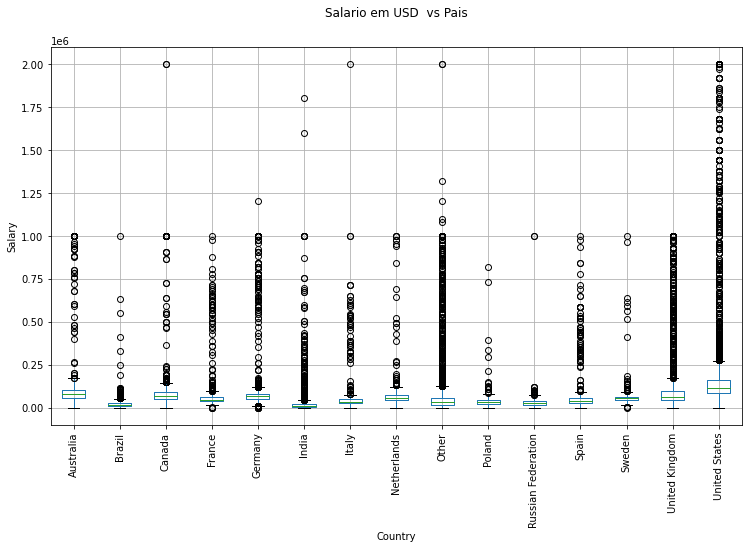

In [8]:
#Inspecionanado Dados Discrepantes do Salario
#Plotando um grafico para analisar visualmente

fig, ax = plt.subplots(1,1, figsize = (12,7))
#Plotando um grafico para mlr analise

df.boxplot("Salary", "Country", ax = ax) #Salario x Country
plt.suptitle("Salario em USD  vs Pais") #Titulo
plt.title(' ')
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()
#Minuto 15:40 do video explica oq esse graficos sao de fato - Botar na apresentação
#Na realidade a maior quantidade de pontos estao nessas caixas azuis
#Os outros que aparecem sao todos outliers
#Como nenhuma caixa toca no eixo de 250.000, vamos retirar os dados acima desse numero

In [9]:
#Tirando os Salarios Outliers
#Se baseando no box plot acima

df = df[df["Salary"] <= 250000]
df = df[df["Salary"] >= 10000]
df = df[df["Country"] != "Other"]


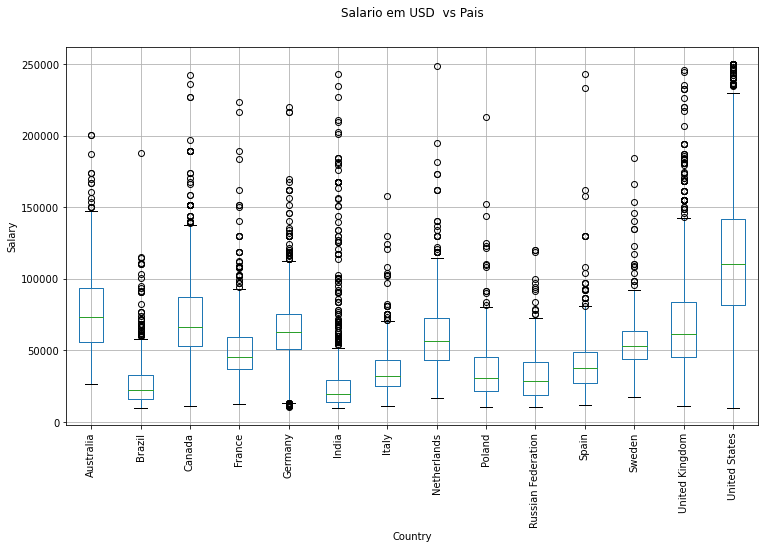

In [10]:
#Plotando o Grafico Novamente

fig, ax = plt.subplots(1,1, figsize = (12,7))
df.boxplot("Salary", "Country", ax = ax)
plt.suptitle("Salario em USD  vs Pais")
plt.title(' ')
plt.ylabel("Salary")
plt.xticks(rotation = 90)
plt.show()



In [11]:
#Agr limpando a coluna de Tempo de experiencia

df["YearsCodePro"].unique()
#Os valores dessa coluna estão como str

array(['13', '4', '2', '7', '20', '1', '3', '10', '12', '29', '6', '28',
       '8', '23', '15', '25', '9', '11', 'Less than 1 year', '5', '21',
       '16', '18', '14', '32', '19', '22', '38', '30', '26', '27', '17',
       '24', '34', '35', '33', '36', '40', '39', 'More than 50 years',
       '31', '37', '41', '45', '42', '44', '43', '50', '49'], dtype=object)

In [12]:
#Criando uma funcao para organizar os dados
#Primeiro vamos classificar os dados "Less than 1 year"
#e "More than 50 years" como 0.5 e 50.

def clean_experience(x):
    if x == "More than 50 years":
        return 50
    if x == "Less than 1 year":
        return 0.5
    return float(x)

df["YearsCodePro"] = df["YearsCodePro"].apply(clean_experience)

df["YearsCodePro"].unique()
#Observe como n esta mais '13' e sim 13.
#Os numeros viraram todos float

array([13. ,  4. ,  2. ,  7. , 20. ,  1. ,  3. , 10. , 12. , 29. ,  6. ,
       28. ,  8. , 23. , 15. , 25. ,  9. , 11. ,  0.5,  5. , 21. , 16. ,
       18. , 14. , 32. , 19. , 22. , 38. , 30. , 26. , 27. , 17. , 24. ,
       34. , 35. , 33. , 36. , 40. , 39. , 50. , 31. , 37. , 41. , 45. ,
       42. , 44. , 43. , 49. ])

In [13]:
df["EdLevel"].unique()
#Aqui os nomes estão muito grandes e temos algumas categorias 'repetidas
#como Doctor degree ou Professional degree que sao todos post grad'

array(['Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)',
       'Professional degree (JD, MD, etc.)',
       'Other doctoral degree (Ph.D., Ed.D., etc.)',
       'I never completed any formal education',
       'Primary/elementary school'], dtype=object)

In [14]:
def clean_education(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x or "Other doctoral" in x:
        return "Post grad"
    return "Less than a Bachelors"

df["EdLevel"] = df["EdLevel"].apply(clean_education) 
df["EdLevel"].unique()
#Observe como os dados estao mais limpos!
#Contudo ainda sao str e isso dificulta o processamento!

array(['Bachelor’s degree', 'Master’s degree', 'Less than a Bachelors',
       'Post grad'], dtype=object)

In [15]:
from sklearn.preprocessing import LabelEncoder #Importando um Encoder do scikitLearn
le_education = LabelEncoder()

df["EdLevel"] = le_education.fit_transform(df["EdLevel"]) #Codificando a coluna EdLevel
df["EdLevel"].unique()
#Agr as str foram substituidas por integrees

array([0, 2, 1, 3])

In [16]:
#A mesma coisa sera feita para os paises uma vez que eles tambem sao str
le_country = LabelEncoder()

df["Country"] = le_country.fit_transform(df["Country"]) #Codificando a coluna Country
df["Country"].unique()

array([13, 12, 10,  7,  4,  2,  6,  1,  3,  5, 11,  8,  0,  9])

In [17]:
#Agr sim começamos a treinar a IA!!

x = df.drop('Salary', axis = 1)
y = df['Salary']

#Como estamos prevendo um numero e nao uma categoria
#Utilizamos o metodo de regresso linear

from sklearn.linear_model import LinearRegression 
#Importando um modelo de processamento de dados

linear_reg = LinearRegression()
linear_reg.fit(x, y.values)

y_pred = linear_reg.predict(x)
#Por simplicidade não iremos separar os dados em Validação e Treinamento

In [18]:
#Agora que treinamos veremos a taxa de sucesso
from sklearn.metrics import mean_squared_error, mean_absolute_error
def exibe_error(y, y_pred):
    error = np.sqrt(mean_squared_error(y,y_pred))
    print("${:,.2f}". format(error))
    
exibe_error(y, y_pred)



$39,274.75


In [19]:
#O modulo de Regressão linear tras uma solução com muito desvio
#o erro ficou em quase 40 mil USD, por isso, iremos tentar outro método

from sklearn.tree import DecisionTreeRegressor

dec_tree_reg = DecisionTreeRegressor(random_state = 0)
dec_tree_reg.fit(x, y.values)

y_pred = dec_tree_reg.predict(x)

In [20]:
exibe_error(y, y_pred)
#O erro continua grande, mas teve uma diminuição consideravel
#por isso utilizaremos mais um modulo

$29,414.94


In [21]:
from sklearn.ensemble import RandomForestRegressor

rand_for_reg = RandomForestRegressor(random_state = 0)
rand_for_reg.fit(x, y.values)

y_pred = rand_for_reg.predict(x)

In [22]:
exibe_error(y, y_pred)
#Nao houve melhora

$29,487.31


In [23]:
#Melhor do que ficar chutando varios metodos
#utilizaremos um comando para indicar o mlr metodo

from sklearn.model_selection import GridSearchCV
#Pesquisa em grade com validação cruzada

max_depth = [None, 2, 4, 6, 8, 10, 12] #Def diferentes parametros
parameters = {"max_depth": max_depth} #Criamos o dicionario

regressor = DecisionTreeRegressor(random_state = 0)
gs = GridSearchCV(regressor, parameters, scoring = "neg_mean_squared_error")
gs.fit(x, y.values)
#Isso nada mais eh do q um loop por todos os diferentes modelos de rede neural
#Basicamente um jeito automatizado de fzr oq estavamos fazendo

GridSearchCV(estimator=DecisionTreeRegressor(random_state=0),
             param_grid={'max_depth': [None, 2, 4, 6, 8, 10, 12]},
             scoring='neg_mean_squared_error')

In [24]:
regressor = gs.best_estimator_

regressor.fit(x, y.values)
y_pred = regressor.predict(x)
exibe_error(y, y_pred)


$30,428.51


In [25]:
#Ainda esta ruim... Mas tudo bem
x

,Country,EdLevel,YearsCodePro
7,13,0,13.0
9,12,2,4.0
10,12,0,2.0
11,10,1,7.0
12,7,1,20.0
...,...,...,...
64113,13,1,15.0
64116,13,0,6.0
64122,13,1,4.0
64127,13,3,12.0


In [26]:
x = np.array([["United States", 'Master’s degree', 15 ]])
x
#Aqui criamos um vetor com os valores que vamos precisar
#Isso vai ser importante pq passaremos de um jeito mais simples as informações para a IA

array([['United States', 'Master’s degree', '15']], dtype='<U15')

In [27]:
x[:, 0] = le_country.transform(x[:,0])
x[:, 1] = le_education.transform(x[:,1])
x = x.astype(float)
x
#Transformamos os dados de str para floats para que possam ser processados

array([[13.,  2., 15.]])

In [28]:
y_pred = regressor.predict(x)
y_pred
#Testando nosso akinator

c:\Users\gusta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])

In [29]:
data = {"model": regressor, "le_country": le_country, "le_education": le_education}
with open('saved_steps.pkl', 'wb') as file:
    pickle.dump(data, file)
#Abrindo como um dicionario e escrevendo em um arquivo binario

In [30]:
with open("saved_steps.pkl", "rb") as file:
    data  = pickle.load(file)
    
regressor_loaded = data["model"]
le_country = data["le_country"]
le_education = data["le_education"]
#Dps de escrevermos no arquivo fazemos o teste de leitura

In [31]:
y_pred = regressor_loaded.predict(x)
y_pred
#Aqui percebemos que o teste de leitura foi um sucesso
#Os resultados batem!

c:\Users\gusta\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


array([139427.26315789])